In [1]:
import dill
dill.load_session("notebook_env.db")

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
data=pd.read_csv("Gender_voice.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [21]:
data["label"]=data["label"].replace({"male":0,"female":1}) #replacing  values in the column for sex rappresentation in int

In [157]:
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [158]:
from scipy.stats import zscore
dataz=data.copy()
for col in list(dataz.columns):
    dataz[col] = zscore(dataz[col])
dataz

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,-1.0
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,-1.0
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,-1.0
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,-1.0
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,1.0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981,1.0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,1.0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,1.0


In [159]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
data_train, data_test = train_test_split(data, test_size=0.25)

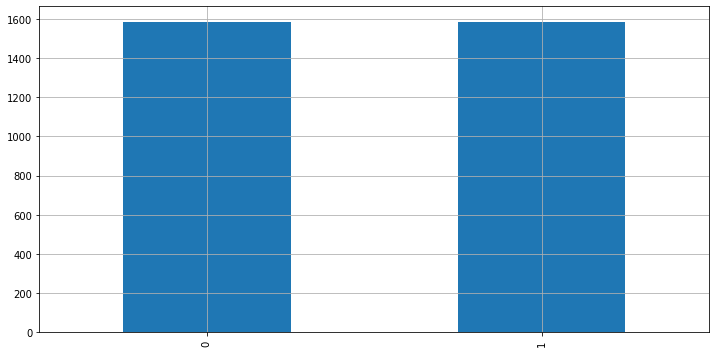

In [160]:
data['label'].value_counts().sort_index().plot.bar(figsize=(12,6))
plt.grid()
plt.show()

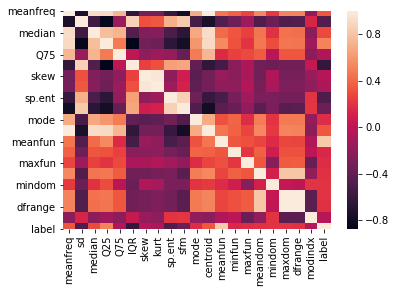

In [6]:
sns.heatmap(dataz.cov())

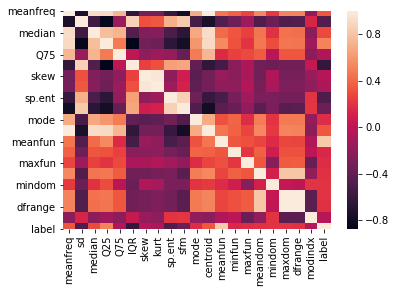

In [162]:
sns.heatmap(data.corr())

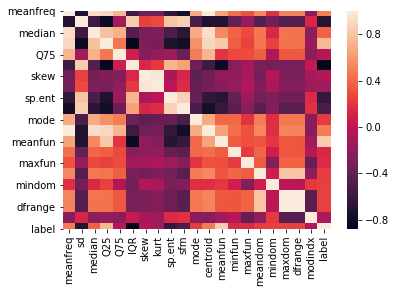

In [8]:
sns.heatmap(data_clean.corr())

In [6]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
print("Pearson Result: ",pearsonr(data['meanfun'],data['IQR']))
print(spearmanr(data['meanfun'],data['IQR']))
print(kendalltau(data['meanfun'],data['IQR']))

Pearson Result:  (-0.5344619483592346, 1.4621495172437248e-233)
SpearmanrResult(correlation=-0.562893988095996, pvalue=2.7557011024504517e-264)
KendalltauResult(correlation=-0.4104174387293439, pvalue=8.631146427927248e-263)


In [109]:
from sklearn.decomposition import PCA
X = data_clean.values
pca = PCA(n_components=5)
pca.fit(X)
tmp=data_clean.copy().reset_index()
Y=pca.transform(data_clean.values)
pca_data=pd.DataFrame()
pca_data["n1"]=Y[:,0]
pca_data["n2"]=Y[:,1]
pca_data["n3"]=Y[:,2]
pca_data["n4"]=Y[:,3]
pca_data["n5"]=Y[:,4]
pca_data.reset_index()
pca_data["label"]=tmp.label
np.random.seed(1234)
pca_train, pca_test = train_test_split(pca_data, test_size=0.25)


array([0, 1], dtype=int64)

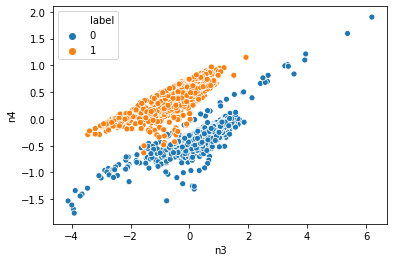

In [97]:
sns.scatterplot(pca_data.n3,pca_data.n4,hue=pca_data.label)
pca_data.label.unique()

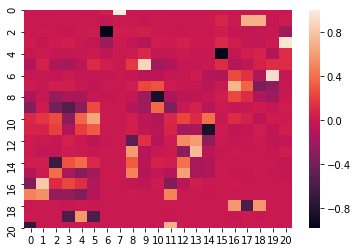

In [164]:
sns.heatmap(pca.components_)

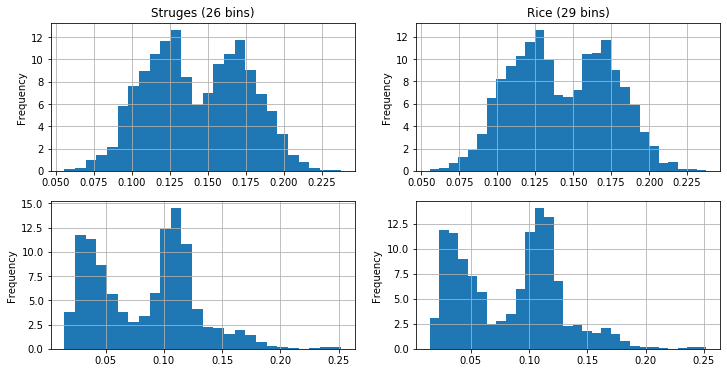

In [166]:
bins_struges=int(3.3*np.log(len(data['meanfun'])))
bins_rice=int(2*len(data['meanfun'])**(1/3))
plt.subplot(2,2,1)
plt.title('Struges ({} bins)'.format(bins_struges))
data['meanfun'].plot.hist(figsize=(12,6), density='True', bins=bins_struges)
plt.grid()
plt.subplot(2,2,2)
plt.title('Rice ({} bins)'.format(bins_rice))
data['meanfun'].plot.hist(figsize=(12,6), density='True', bins=bins_rice)
plt.grid()
plt.subplot(2,2,3)
data['IQR'].plot.hist(figsize=(12,6), density='True', bins=bins_struges)
plt.grid()
plt.subplot(2,2,4)
data['IQR'].plot.hist(figsize=(12,6), density='True', bins=bins_rice)
plt.grid()
plt.show()

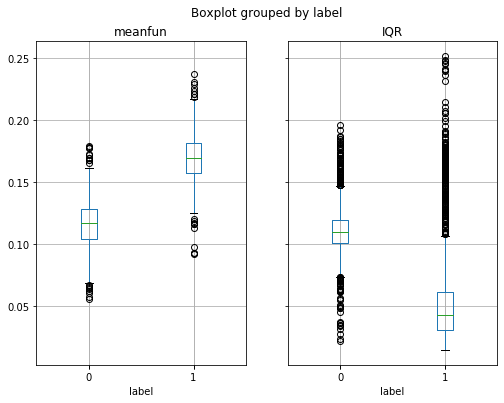

In [168]:
data.boxplot(by='label',column=['meanfun',"IQR"], figsize=(8,6))
plt.show()

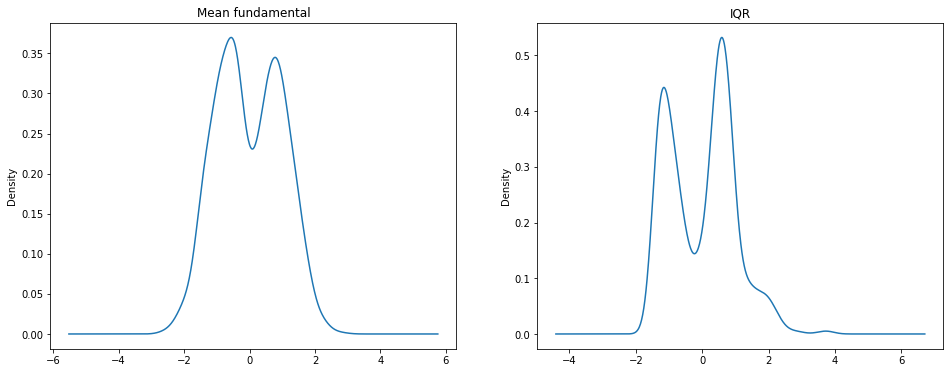

In [35]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Mean fundamental')
dataz['meanfun'].plot.density()
plt.subplot(122)
plt.title('IQR')
dataz['IQR'].plot.density()
plt.show()

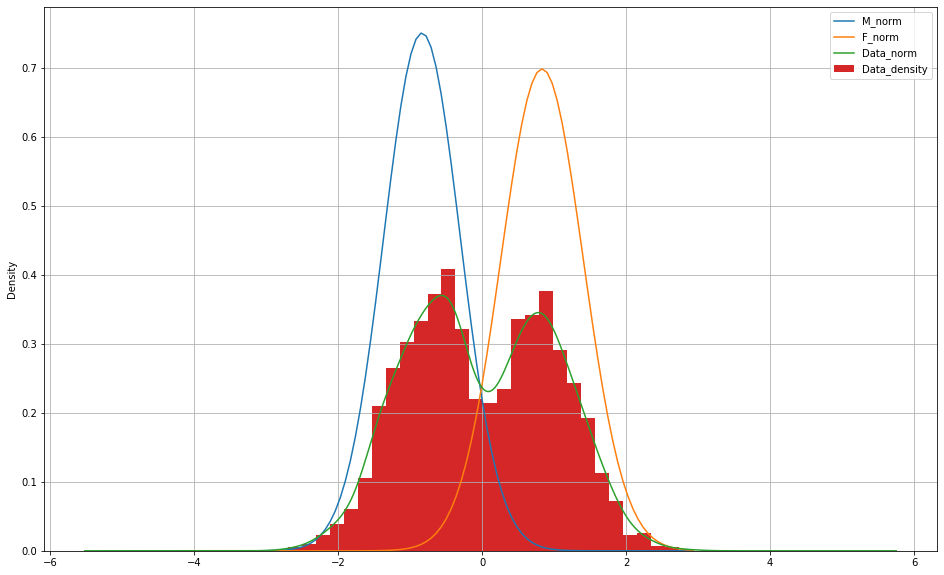

In [3]:
from scipy.stats import norm
mu = dataz['meanfun'].mean()
sigma = dataz['meanfun'].std()
mum = dataz[dataz["label"]==-1]['meanfun'].mean()
sigmam = dataz[dataz["label"]==-1]['meanfun'].std()
muf = dataz[dataz["label"]==1]['meanfun'].mean()
sigmaf = dataz[dataz["label"]==1]['meanfun'].std()
gf_mf = norm(muf,sigmaf)
gm_mf = norm(mum,sigmam)
x=np.linspace(-4,dataz['meanfun'].max(),100)
g_mf = norm(mu,sigma)
x=np.linspace(-4,dataz['meanfun'].max(),100)
plt.figure(figsize=(16,10))
plt.plot(x,gm_mf.pdf(x))
plt.plot(x,gf_mf.pdf(x))
dataz['meanfun'].plot.density()
plt.hist(dataz['meanfun'], density=True,bins=bins_rice)
plt.legend(['M_norm','F_norm',"Data_norm",'Data_density','Data_histo'])
plt.grid()

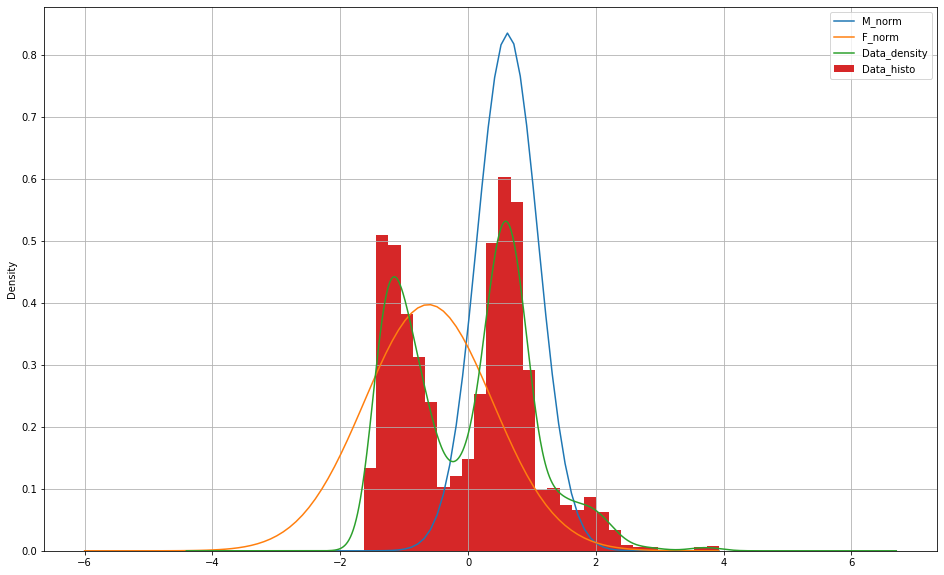

In [2]:
mum = dataz[dataz["label"]==-1]['IQR'].mean()
sigmam = dataz[dataz["label"]==-1]['IQR'].std()
muf = dataz[dataz["label"]==1]['IQR'].mean()
sigmaf = dataz[dataz["label"]==1]['IQR'].std()
gf_iqr = norm(muf,sigmaf)
gm_iqr = norm(mum,sigmam)
x=np.linspace(-6,dataz['IQR'].max(),100)
plt.figure(figsize=(16,10))
plt.plot(x,gm_iqr.pdf(x))
plt.plot(x,gf_iqr.pdf(x))
dataz['IQR'].plot.density()
plt.hist(dataz['IQR'], density=True,bins=bins_rice)
plt.grid()
plt.legend(['M_norm','F_norm','Data_density','Data_histo'])
plt.show()

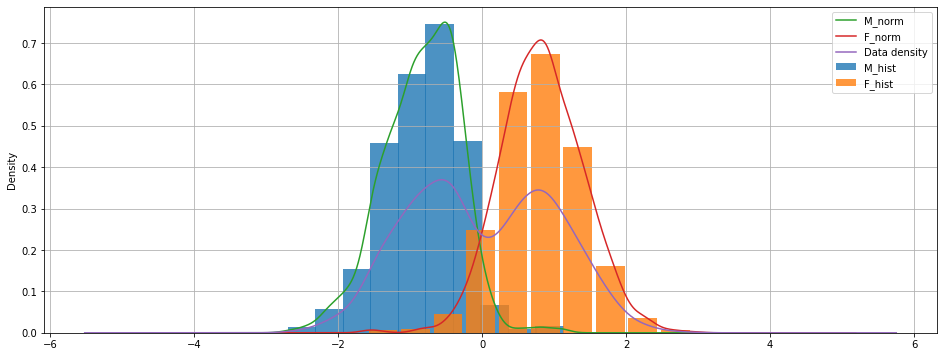

In [4]:
dataz.groupby('label')['meanfun'].plot.hist(width=0.4, alpha=0.8, density=True, figsize=(16,6))
dataz.groupby('label')['meanfun'].plot.density()
dataz["meanfun"].plot.density()
plt.legend(['M_norm','F_norm','Data density','M_hist',"F_hist"])
plt.grid()
plt.show()

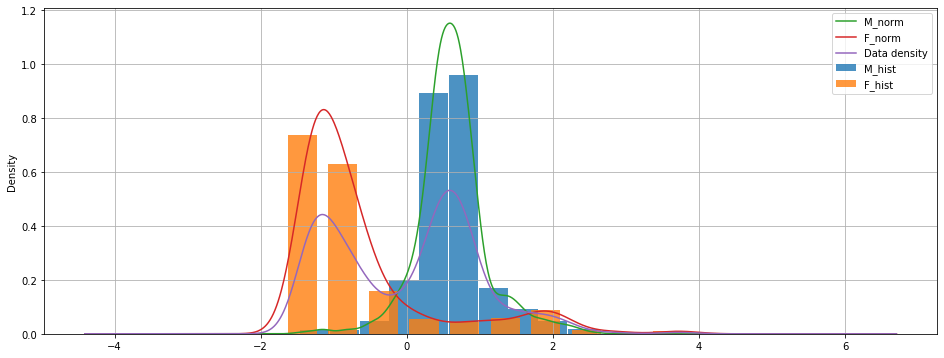

In [5]:
dataz.groupby('label')['IQR'].plot.hist(width=0.4, alpha=0.8, density=True, figsize=(16,6))
dataz.groupby('label')['IQR'].plot.density()
dataz["IQR"].plot.density()
plt.legend(['M_norm','F_norm','Data density','M_hist',"F_hist"])
plt.grid()
plt.show()

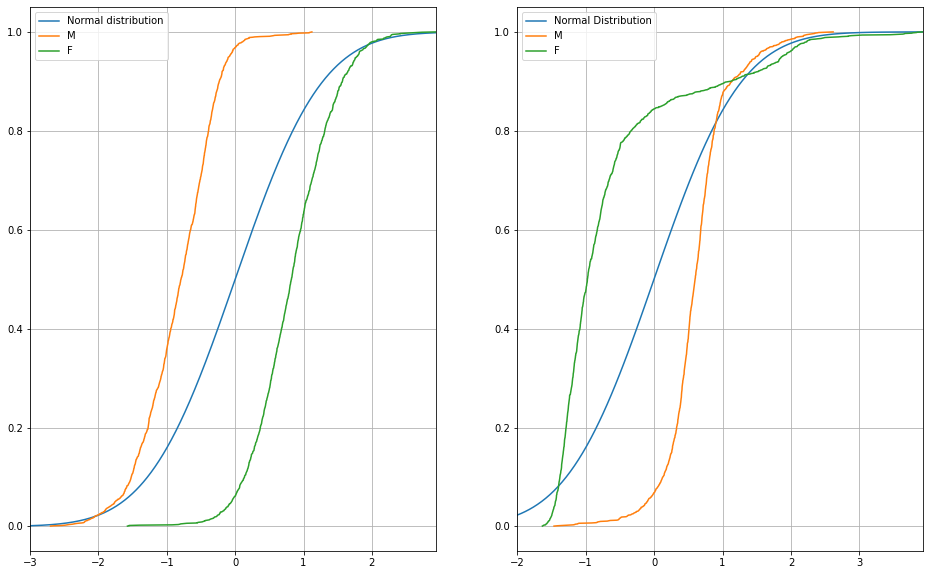

In [174]:
x=np.linspace(-3,dataz['meanfun'].max(),1000)
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.plot(x,g_mf.cdf(x))
dataz[dataz['label']==-1]['meanfun'].value_counts(normalize="true").sort_index().cumsum().plot()
dataz[dataz['label']==1]['meanfun'].value_counts(normalize="true").sort_index().cumsum().plot()
plt.grid()
plt.legend(["Normal distribution",'M','F'])

mui=dataz["IQR"].mean()
sdi=dataz["IQR"].std()
gi=norm(mui,sdi)
x=np.linspace(-2,dataz["IQR"].max(),100)
plt.subplot(122)
plt.plot(x,gi.cdf(x))
dataz[dataz['label']==-1]['IQR'].value_counts(normalize="true").sort_index().cumsum().plot()
dataz[dataz['label']==1]['IQR'].value_counts(normalize="true").sort_index().cumsum().plot()
plt.grid()
plt.legend(["Normal Distribution",'M','F'])

plt.show()

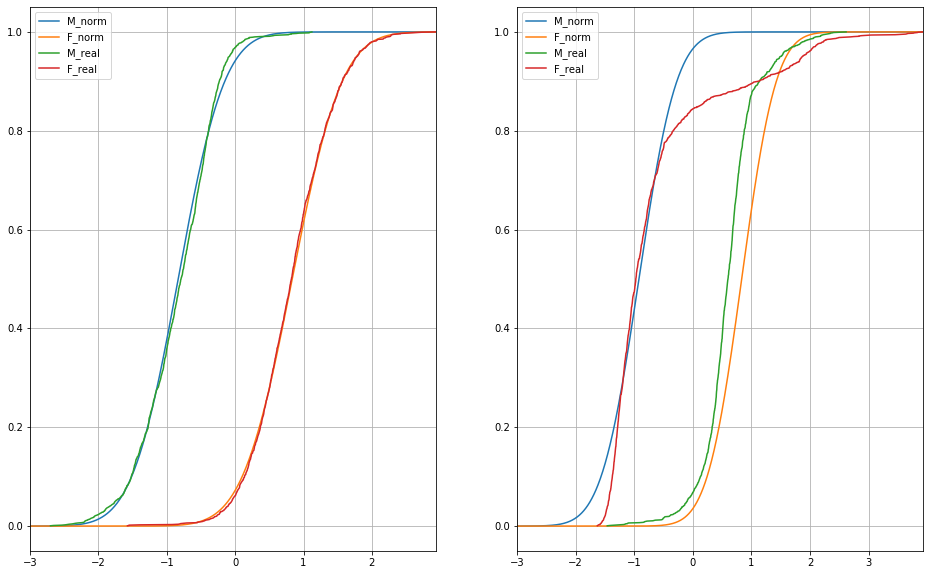

In [194]:
x=np.linspace(-3,dataz['meanfun'].max(),1000)
mum = dataz[dataz["label"]==-1]['meanfun'].mean()
sigmam = dataz[dataz["label"]==-1]['meanfun'].std()
muf = dataz[dataz["label"]==1]['meanfun'].mean()
sigmaf = dataz[dataz["label"]==1]['meanfun'].std()
gf_mf = norm(muf,sigmaf)
gm_mf = norm(mum,sigmam)
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.plot(x,gm_mf.cdf(x))
plt.plot(x,gf_mf.cdf(x))
dataz[dataz['label']==-1]['meanfun'].value_counts(normalize="true").sort_index().cumsum().plot()
dataz[dataz['label']==1]['meanfun'].value_counts(normalize="true").sort_index().cumsum().plot()
plt.grid()
plt.legend(["M_norm","F_norm",'M_real','F_real'])


x=np.linspace(-3,dataz['IQR'].max(),1000)
plt.subplot(122)
plt.plot(x,gf_iqr.cdf(x))
plt.plot(x,gm_iqr.cdf(x))
dataz[dataz['label']==-1]['IQR'].value_counts(normalize="true").sort_index().cumsum().plot()
dataz[dataz['label']==1]["IQR"].value_counts(normalize="true").sort_index().cumsum().plot()
plt.grid()
plt.legend(["M_norm","F_norm",'M_real','F_real'])
plt.show()

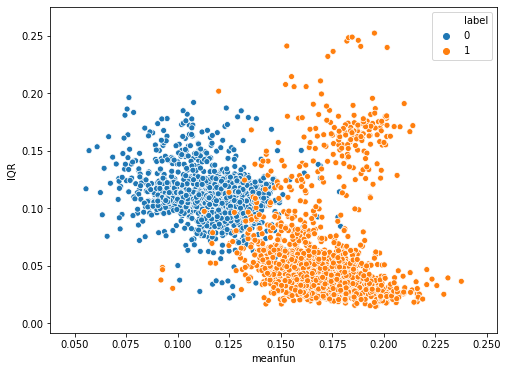

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot( data['meanfun'],data['IQR'], hue=data['label'])
plt.show()

<h1> Removing outliers

In [16]:
mean_m_mf=data[data["label"]==0]['meanfun'].mean()
mean_f_mf=data[data["label"]==1]['meanfun'].mean()
mean_m_iqr=data[data["label"]==0]['IQR'].mean()
mean_f_iqr=data[data["label"]==1]['IQR'].mean()
std_m_mf=data[data["label"]==0]['meanfun'].std()
std_f_mf=data[data["label"]==0]['meanfun'].std()
std_m_iqr=data[data["label"]==0]['IQR'].std()
std_f_iqr=data[data["label"]==0]['IQR'].std()
data_clean=pd.DataFrame()
data_clean=data[(data["label"]==0) & ((data["meanfun"]>mean_m_mf-3*std_m_mf)& (data["meanfun"]<mean_m_mf+3*std_m_mf)) &(data["IQR"]>mean_m_iqr-3*std_m_iqr)& (data["IQR"]<mean_m_iqr+3*std_m_iqr) ].copy()
data_clean=data_clean.append(data[(data["label"]==1) & ((data["meanfun"]>mean_f_mf-3*std_f_mf)& (data["meanfun"]<mean_f_mf+3*std_f_mf)) &(data["IQR"]>mean_f_iqr-3*std_f_iqr)& (data["IQR"]<mean_f_iqr+3*std_f_iqr) ])
print("Data reduted to %:",(len(data_clean)*100)/len(data))

Data reduted to %: 92.32954545454545


In [216]:
np.random.seed(1234)
data_clean_train, data_clean_test = train_test_split(data_clean, test_size=0.25)

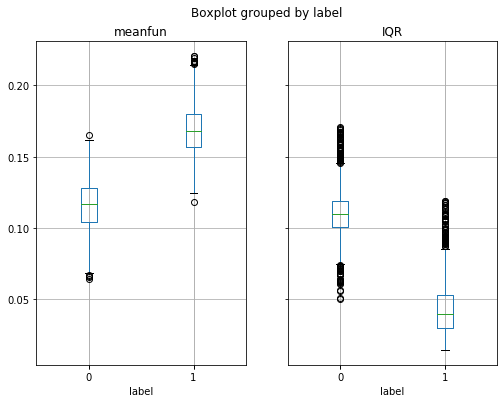

In [178]:
data_clean.boxplot(by='label',column=['meanfun',"IQR"], figsize=(8,6))
plt.show()

In [36]:
print("Pearson Result:",pearsonr(data_clean['meanfun'],data_clean['IQR']))
print(spearmanr(data_clean['meanfun'],data_clean['IQR']))
print(kendalltau(data_clean['meanfun'],data_clean['IQR']))

Pearson Result: (-0.81188353077997, 0.0)
SpearmanrResult(correlation=-0.7739169996574142, pvalue=0.0)
KendalltauResult(correlation=-0.5485221095817779, pvalue=0.0)


In [179]:
dataz_clean=data_clean.copy()
for col in list(dataz_clean.columns):
    dataz_clean[col] = zscore(dataz_clean[col])
dataz_clean.label=dataz_clean.label.round()

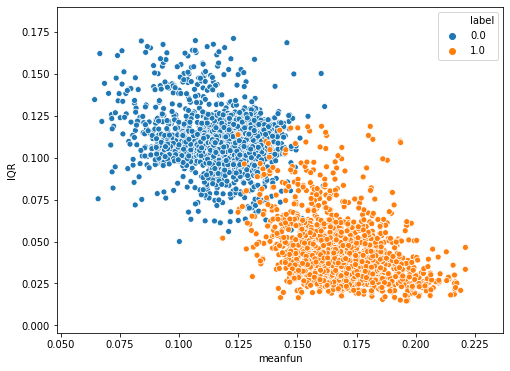

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(data_clean['meanfun'],data['IQR'], hue=data_clean['label'])
plt.show()

In [93]:
import dill
dill.dump_session('notebook_env.db')